<a href="https://colab.research.google.com/github/Kobzarko/python_for_DA_tasks/blob/main/hw_6_3_%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D1%96%D1%80%D0%BA%D0%B0_%D0%B2%D0%B8%D0%B1%D1%96%D1%80%D0%BA%D0%B8_%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%96%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнє завдання на тему "Перевірка вибірки на нормальність"

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data_path ='/content/drive/MyDrive/Colab Notebooks/Data/data.csv'

df = pd.read_csv(data_path)

Mounted at /content/drive


Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [3]:
data = df['data'].to_numpy()

In [4]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

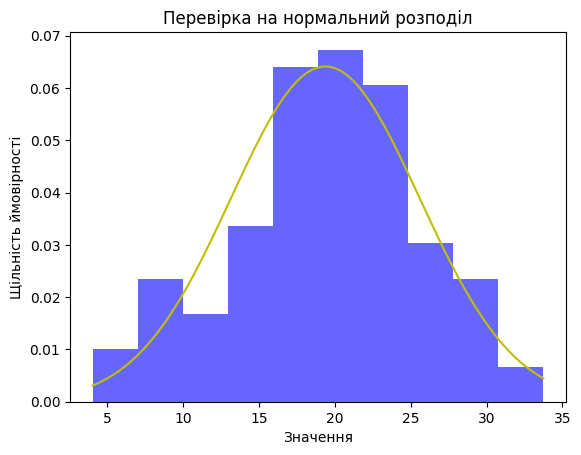

In [13]:
# Значення для осі x (в діапазоні значень твоїх даних)
x_axis = np.arange(data.min(), data.max(), 0.01)

# Побудова гістограми (з параметром density=True, щоб нормувати її)
plt.hist(data, bins=10, density=True, alpha=0.6, color='b')

# Обчислюємо середнє і стандартне відхилення
mean = np.mean(data)
std = np.std(data)

# Побудова теоретичної кривої нормального розподілу
plt.plot(x_axis, stats.norm.pdf(x_axis, mean, std), color='y')

# Підписи осей та заголовок
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.title('Перевірка на нормальний розподіл')

# Показуємо графік
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

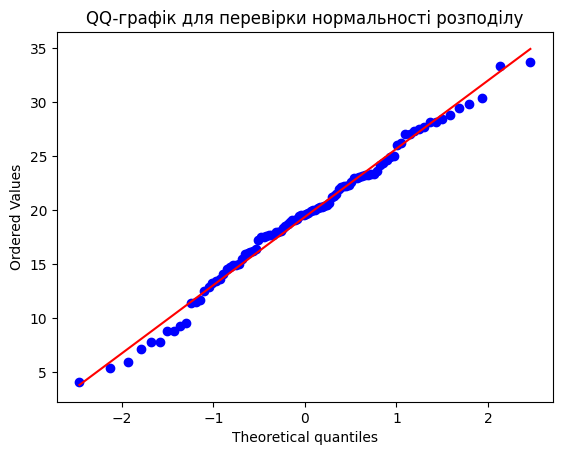

In [15]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


Перевірка даних на нормальність за допомогою тестів Шапіро-Вілка або тест Д'Агостино К^2

In [18]:
from scipy.stats import shapiro, normaltest

stat, p_value_shapiro = shapiro(data)
print("Тест Шапіро-Вілка:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)

# Тест Д'Агостино К^2 додатково
stat, p_value_agostino = normaltest(data)
print("\nТест Д'Агостино К^2:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_agostino)

# Інтерпретація результатів
if p_value_shapiro > 0.05:
    print("\nЗа результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("\nЗа результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).")

if p_value_agostino > 0.05:
    print("За результатами тесту Д'Агостино К^2 дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("За результатами тесту Д'Агостино К^2 дані не мають нормального розподілу (відхиляємо H0).")


Тест Шапіро-Вілка:
Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921

Тест Д'Агостино К^2:
Статистика тесту: 0.7643346244358424
P-значення: 0.6823808729964564

За результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).
За результатами тесту Д'Агостино К^2 дані мають нормальний розподіл (не відхиляємо H0).
